In [2]:
import networkx as nx
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
import ndlib.models.ModelConfig as mc
from ndlib.viz.bokeh.MultiPlot import MultiPlot
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Helper functions

def config_SIR(model, beta, gamma, fraction_infected):
    '''Takes the SIR model as input and its parameters
    Configures said model with these parameters.'''
    config = mc.Configuration()
    config.add_model_parameter('beta', beta)
    config.add_model_parameter('gamma', gamma)
    config.add_model_parameter("fraction_infected", fraction_infected)
    model.set_initial_status(config)
    
    
def get_SIR_result_lists(results):
    '''Takes SIR simulation results (model.build_trends(iterations)) as input variable
    Unpacks this variable and outputs S, I, R node count as lists.'''
    S_node_count = results[0]['trends']['node_count'][0]
    I_node_count = results[0]['trends']['node_count'][1]
    R_node_count = results[0]['trends']['node_count'][2]
    return S_node_count, I_node_count, R_node_count


def average_clustering_coef(network, N):
    '''Takes some network G and the number of nodes of the network.
    Calculates the clustering coefficient for every node and returns the average.'''
    cluster_coef_list = list(nx.clustering(network).values())
    avg_clustering_coef = sum(cluster_coef_list)/N
    return avg_clustering_coef

def list_avg(input_list):
    '''calculated the average of a list of numbers'''
    return sum(input_list)/len(input_list)

**Investigate the effect of network parameters on the spread**

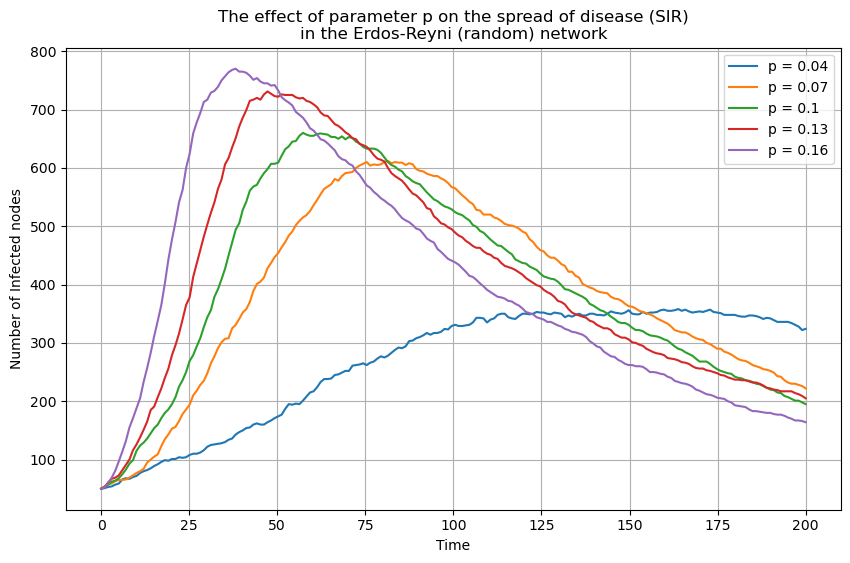

In [4]:
#Simulate Erdos-Reyni (random) network. Investigate the effect of p on the spread of disease (SIR).

p_variations = [0.04, 0.07, 0.1, 0.13, 0.16]
beta = 0.001
gamma = 0.01
fraction_infected = 0.05
time_steps = 200
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for p in p_variations:
    # Network Definition
    g = nx.erdos_renyi_graph(N, p)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'p = {p}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter p on the spread of disease (SIR)\nin the Erdos-Reyni (random) network')
    plt.legend()
    plt.grid(True)
    

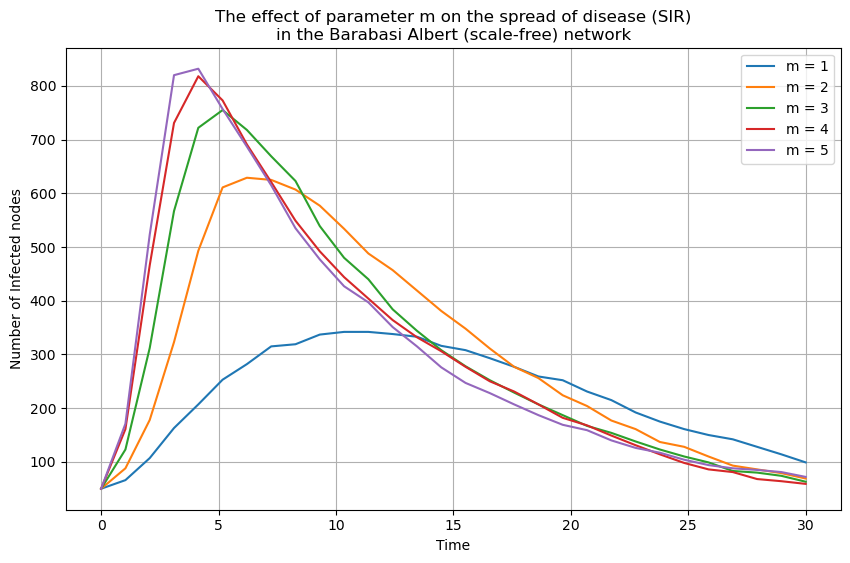

In [5]:
#Simulate Barabasi Albert (scale-free) network. Investigate the effect of m on the spread of disease (SIR).

m_variations = [1, 2, 3, 4, 5]
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for m in m_variations:
    # Network Definition
    g = nx.barabasi_albert_graph(N, m)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'm = {m}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter m on the spread of disease (SIR)\nin the Barabasi Albert (scale-free) network')
    plt.legend()
    plt.grid(True)
    #TODO: make sure (SIR) parameters are in the description of the graph!

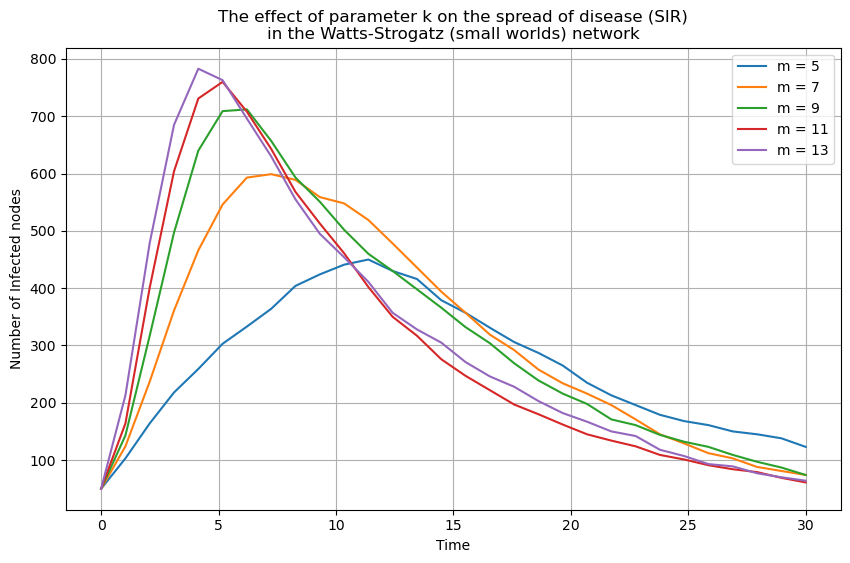

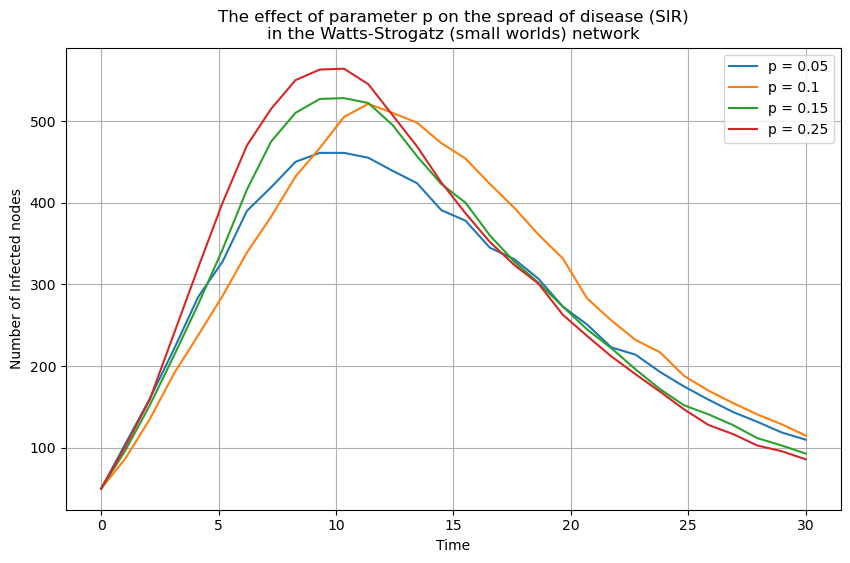

In [6]:
#Simulate Watts-Strogatz (small worlds) network. Investigate the effect of k on the spread of disease (SIR).

k_variations = [5, 7, 9, 11, 13]
prob = 0.05
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for k in k_variations:
    # Network Definition
    g = nx.watts_strogatz_graph(N, k, prob)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'm = {k}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter k on the spread of disease (SIR)\nin the Watts-Strogatz (small worlds) network')
    plt.legend()
    plt.grid(True)
    #TODO: make sure (SIR) parameters are in the description of the graph!
    
    
#Simulate Watts-Strogatz (small worlds) network. Investigate the effect of p (prob) on the spread of disease (SIR).

k = 5
prob_variations = [0.05, 0.10, 0.15, 0.25]
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for prob in prob_variations:
    # Network Definition
    g = nx.watts_strogatz_graph(N, k, prob)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'p = {prob}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter p on the spread of disease (SIR)\nin the Watts-Strogatz (small worlds) network')
    plt.legend()
    plt.grid(True)
    
    #TODO: make sure (SIR) parameters are in the description of the graph!

**Generate Networks of equivalent form**

In [43]:
#Finding networks of equivalent form: We control for N and number of edges

N = 1000
plt.figure(figsize=(10, 6))

ER_edge_num = []
BA_edge_num = []
WS_edge_num = []

for i in range(10):
    #Erdos-Reyni (random) network
    ER = nx.erdos_renyi_graph(N, 0.01)
    ER_edge_num.append(nx.number_of_edges(ER))

    #Simulate Barabasi Albert (scale-free) network
    BA = nx.barabasi_albert_graph(N, 5)
    BA_edge_num.append(nx.number_of_edges(BA))

    #Watts-Strogatz (small worlds) network
    WS = nx.watts_strogatz_graph(N, 10, 0.15)
    WS_edge_num.append(nx.number_of_edges(WS))

print(list_avg(ER_edge_num))
print(list_avg(BA_edge_num))
print(list_avg(WS_edge_num))

5013.8
4975.0
5000.0


<Figure size 1000x600 with 0 Axes>

In [19]:
# nx.graph_edit_distance(BA, WS) #too computationally expnsive, breaks the kernel

20.0

800
900
1000
1100
1200
1300
1400


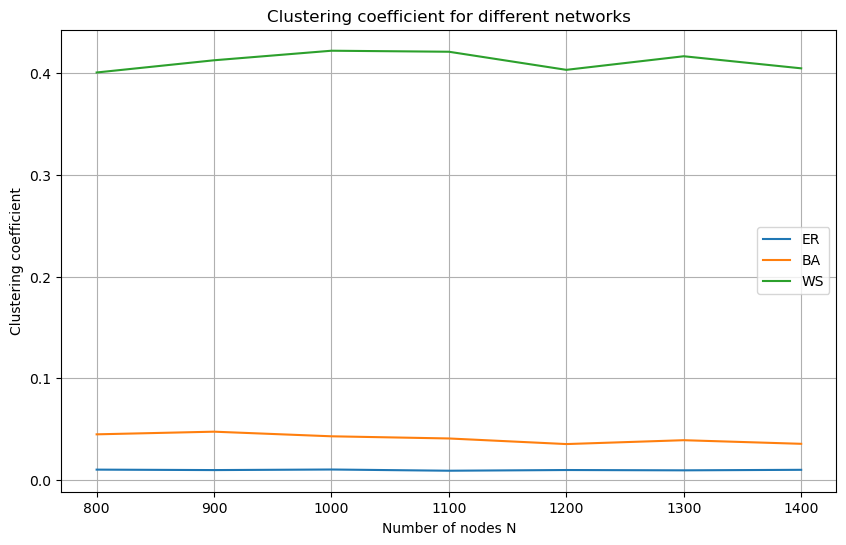

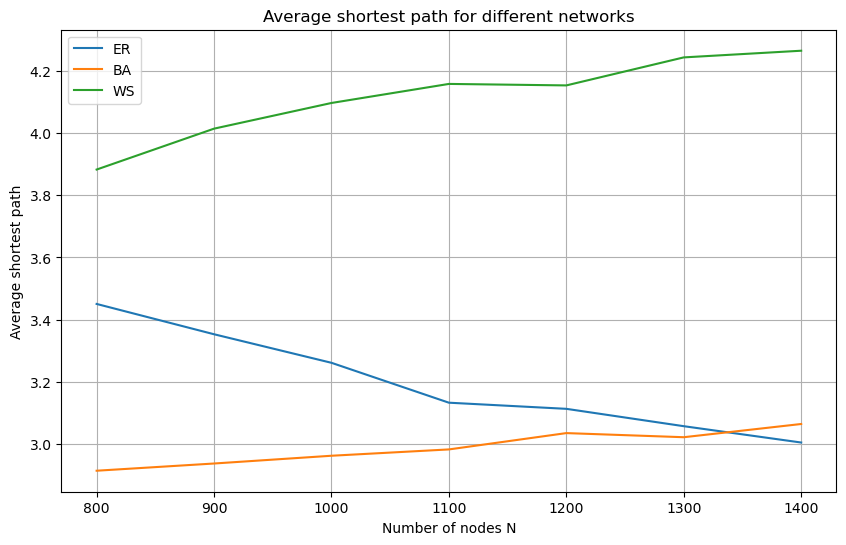

In [66]:
#Plotting Network statistics against N

N_variations = range(800, 1500, 100)

ER_clust_coef = []
BA_clust_coef = []
WS_clust_coef = []

ER_avg_shortest_path = []
BA_avg_shortest_path = []
WS_avg_shortest_path = []

for N in N_variations:
    print(N)
    #Erdos-Reyni (random) network
    ER = nx.erdos_renyi_graph(N, 0.01)
    avg_clustering_coef_ER = average_clustering_coef(ER, N)
    ER_clust_coef.append(avg_clustering_coef_ER)
    ER_avg_shortest_path.append(nx.average_shortest_path_length(ER))
    
    #Simulate Barabasi Albert (scale-free) network
    BA = nx.barabasi_albert_graph(N, 5)
    avg_clustering_coef_BA = average_clustering_coef(BA, N)
    BA_clust_coef.append(avg_clustering_coef_BA)
    BA_avg_shortest_path.append(nx.average_shortest_path_length(BA))
    
    #Watts-Strogatz (small worlds) network
    WS = nx.watts_strogatz_graph(N, 10, 0.15)
    avg_clustering_coef_WS = average_clustering_coef(WS, N)
    WS_clust_coef.append(avg_clustering_coef_WS)
    WS_avg_shortest_path.append(nx.average_shortest_path_length(WS))

#Plot
plt.figure(figsize=(10, 6))
plt.plot(N_variations, ER_clust_coef, label = 'ER')
plt.plot(N_variations, BA_clust_coef, label = 'BA')
plt.plot(N_variations, WS_clust_coef, label = 'WS')
plt.xlabel('Number of nodes N')
plt.ylabel('Clustering coefficient')
plt.title('Clustering coefficient for different networks')
plt.legend()
plt.grid(True)
#TODO: Insert parameter values
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_variations, ER_avg_shortest_path, label = 'ER')
plt.plot(N_variations, BA_avg_shortest_path, label = 'BA')
plt.plot(N_variations, WS_avg_shortest_path, label = 'WS')
plt.xlabel('Number of nodes N')
plt.ylabel('Average shortest path')
plt.title('Average shortest path for different networks')
plt.legend()
plt.grid(True)
#TODO: Insert parameter values
plt.show()



(array([1., 0., 0., 1., 0., 2., 0., 1., 0., 2.]),
 array([0.00909374, 0.00921286, 0.00933198, 0.0094511 , 0.00957022,
        0.00968934, 0.00980846, 0.00992758, 0.0100467 , 0.01016582,
        0.01028494]),
 <BarContainer object of 10 artists>)

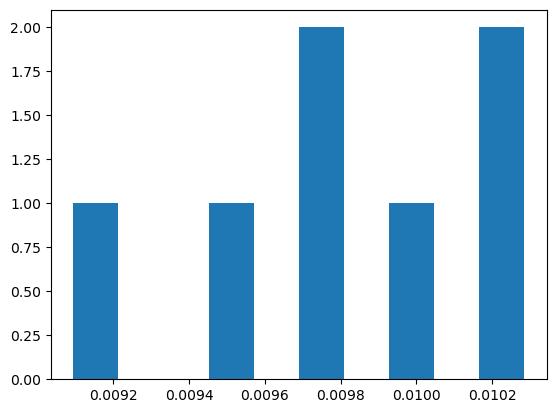

In [67]:
#TODO: create histograms for above plots